## Historical Pollution Sept 2023

abrir el JSON desde un archivo, realizar el cambio del formato de fecha y realizar una consulta por fecha en Python:

In [17]:
import json
from datetime import datetime
from datetime import time
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
# Abrir el archivo JSON
with open('Datasets\Historical pollution septiembre 2023.json', 'r') as archivo_json:
    data_dict = json.load(archivo_json)

# Mostrar el contenido original del JSON
print("Contenido original del JSON:")
print(json.dumps(data_dict, indent=2))

Contenido original del JSON:
{
  "coord": {
    "lon": -73.9604,
    "lat": 40.7896
  },
  "list": [
    {
      "main": {
        "aqi": 3
      },
      "components": {
        "co": 947.95,
        "no": 87.62,
        "no2": 47.3,
        "o3": 0,
        "so2": 6.97,
        "pm2_5": 29.53,
        "pm10": 33.77,
        "nh3": 2.91
      },
      "dt": 1672531200
    },
    {
      "main": {
        "aqi": 3
      },
      "components": {
        "co": 867.84,
        "no": 74.21,
        "no2": 49.35,
        "o3": 0,
        "so2": 6.26,
        "pm2_5": 28.43,
        "pm10": 32.98,
        "nh3": 2.94
      },
      "dt": 1672534800
    },
    {
      "main": {
        "aqi": 2
      },
      "components": {
        "co": 741,
        "no": 53.64,
        "no2": 50.72,
        "o3": 0,
        "so2": 5.9,
        "pm2_5": 22.58,
        "pm10": 26.64,
        "nh3": 2.37
      },
      "dt": 1672538400
    },
    {
      "main": {
        "aqi": 2
      },
      "components":

 ## Fields in API response


* coord Coordinates from the specified location (latitude, longitude)

 list
* dt Date and time, Unix, UTC

main
* main.aqi Air Quality Index. Possible values: 1, 2, 3, 4, 5. Where 1 = Good, 2 = Fair, 3 = Moderate, 4 = Poor, 5 = Very Poor. If you want to recalculate Air Quality indexes according UK, Europe, USA and Mainland China scales please use "Air Pollution Index levels scale" page

components
* components.co Сoncentration of CO (Carbon monoxide), μg/m3
* components.no Сoncentration of NO (Nitrogen monoxide), μg/m3
* components.no2 Сoncentration of NO2 (Nitrogen dioxide), μg/m3
* components.o3 Сoncentration of O3 (Ozone), μg/m3
* components.so2 Сoncentration of SO2 (Sulphur dioxide), μg/m3
* components.pm2_5 Сoncentration of PM2.5 (Fine particles matter), μg/m3
* components.pm10 Сoncentration of PM10 (Coarse particulate matter), μg/m3
* components.nh3 Сoncentration of NH3 (Ammonia), μg/m3*

In [4]:

# Crear una función para convertir el formato de fecha
def convertir_formato_fecha(item):
    # Convertir el dt a un objeto de datetime y reemplazar la clave 'dt'
    item['fecha'] = datetime.utcfromtimestamp(item.pop('dt'))

# Aplicar la función de conversión de formato de fecha a cada elemento de la lista
for item in data_dict['list']:
    convertir_formato_fecha(item)

# Mostrar el contenido del JSON con el nuevo formato de fecha
print("\nContenido del JSON con nuevo formato de fecha:")
print(json.dumps(data_dict, default=str, indent=2))  # Se utiliza default=str para formatear fechas a cadenas


Contenido del JSON con nuevo formato de fecha:
{
  "coord": {
    "lon": -73.9604,
    "lat": 40.7896
  },
  "list": [
    {
      "main": {
        "aqi": 3
      },
      "components": {
        "co": 947.95,
        "no": 87.62,
        "no2": 47.3,
        "o3": 0,
        "so2": 6.97,
        "pm2_5": 29.53,
        "pm10": 33.77,
        "nh3": 2.91
      },
      "fecha": "2023-01-01 00:00:00"
    },
    {
      "main": {
        "aqi": 3
      },
      "components": {
        "co": 867.84,
        "no": 74.21,
        "no2": 49.35,
        "o3": 0,
        "so2": 6.26,
        "pm2_5": 28.43,
        "pm10": 32.98,
        "nh3": 2.94
      },
      "fecha": "2023-01-01 01:00:00"
    },
    {
      "main": {
        "aqi": 2
      },
      "components": {
        "co": 741,
        "no": 53.64,
        "no2": 50.72,
        "o3": 0,
        "so2": 5.9,
        "pm2_5": 22.58,
        "pm10": 26.64,
        "nh3": 2.37
      },
      "fecha": "2023-01-01 02:00:00"
    },
    {


In [5]:
# Crear una función para buscar por fecha y devolver el AQI con su descripción
def buscar_aqi_por_fecha(fecha_buscar):
    for item in data_dict['list']:
        # Comparar la fecha y hora
        if item['fecha'] == fecha_buscar:
            aqi = item['main']['aqi']
            descripcion_aqi = {
                1: "Good",
                2: "Fair",
                3: "Moderate",
                4: "Poor",
                5: "Very Poor"
            }
            return aqi, descripcion_aqi[aqi]

    return None, None

# Especificar la fecha que quieres buscar (ajusta esto según tus necesidades)
fecha_a_buscar = datetime(2023, 1, 9, 0, 0, 0)

# Buscar y mostrar el AQI con su descripción para la fecha especificada
aqi_en_fecha, descripcion_aqi_en_fecha = buscar_aqi_por_fecha(fecha_a_buscar)
if aqi_en_fecha is not None:
    print(f"\nAQI para {fecha_a_buscar}: {aqi_en_fecha} ({descripcion_aqi_en_fecha})")
else:
    print(f"\nNo se encontró AQI para {fecha_a_buscar}")


AQI para 2023-01-09 00:00:00: 3 (Moderate)


2023-01-30 13:00:00

## Evolucion de la contaminacion del aire en NYC para septiembre 23

In [6]:

# Ruta del archivo JSON
archivo_json = 'Datasets\Historical pollution septiembre 2023.json'

# Abrir el nuevo archivo JSON descargado
with open(archivo_json, 'r') as archivo_json:
    nuevo_data_dict = json.load(archivo_json)

# Convertir a DataFrame de pandas
df_historical_polution_sept_23 = pd.json_normalize(nuevo_data_dict['list'])

# Mostrar el contenido original del nuevo JSON
print("Contenido original del nuevo JSON:")
print(json.dumps(nuevo_data_dict, indent=2))

# Guardar el DataFrame como un archivo CSV
df_historical_polution_sept_23.to_csv('Datasets/historical_polution_sept_23.csv', index=False)



Contenido original del nuevo JSON:
{
  "coord": {
    "lon": -73.9604,
    "lat": 40.7896
  },
  "list": [
    {
      "main": {
        "aqi": 3
      },
      "components": {
        "co": 947.95,
        "no": 87.62,
        "no2": 47.3,
        "o3": 0,
        "so2": 6.97,
        "pm2_5": 29.53,
        "pm10": 33.77,
        "nh3": 2.91
      },
      "dt": 1672531200
    },
    {
      "main": {
        "aqi": 3
      },
      "components": {
        "co": 867.84,
        "no": 74.21,
        "no2": 49.35,
        "o3": 0,
        "so2": 6.26,
        "pm2_5": 28.43,
        "pm10": 32.98,
        "nh3": 2.94
      },
      "dt": 1672534800
    },
    {
      "main": {
        "aqi": 2
      },
      "components": {
        "co": 741,
        "no": 53.64,
        "no2": 50.72,
        "o3": 0,
        "so2": 5.9,
        "pm2_5": 22.58,
        "pm10": 26.64,
        "nh3": 2.37
      },
      "dt": 1672538400
    },
    {
      "main": {
        "aqi": 2
      },
      "compon

In [7]:
df_contaminacion_aire_sept_23 = pd.read_csv('Datasets/historical_polution_sept_23.csv')
df_contaminacion_aire_sept_23

,dt,main.aqi,components.co,components.no,components.no2,components.o3,components.so2,components.pm2_5,components.pm10,components.nh3
0,1672531200,3,947.95,87.62,47.30,0.00,6.97,29.53,33.77,2.91
1,1672534800,3,867.84,74.21,49.35,0.00,6.26,28.43,32.98,2.94
2,1672538400,2,741.00,53.64,50.72,0.00,5.90,22.58,26.64,2.37
3,1672542000,2,594.14,33.53,47.98,0.00,5.84,16.07,19.31,1.76
4,1672545600,2,487.33,16.99,45.93,0.02,5.72,11.69,13.89,1.17
...,...,...,...,...,...,...,...,...,...,...
718,1675116000,3,680.92,40.68,70.60,1.07,21.46,38.78,47.53,3.45
719,1675119600,3,794.41,52.75,71.97,0.00,15.74,42.78,52.10,3.96
720,1675123200,3,867.84,59.90,73.34,0.00,10.97,46.74,56.54,3.80
721,1675126800,4,934.60,66.16,73.34,0.00,8.46,51.33,62.55,3.83


In [16]:


# Supongamos que tienes una columna 'main.aqi' en tu DataFrame
# y deseas mapear los valores numéricos a nombres de categorías

# Crear el diccionario de mapeo
mapeo_aqi = {
    1: 'Good',
    2: 'Fair',
    3: 'Moderate',
    4: 'Poor',
    5: 'Very Poor'
}

# Aplicar el mapeo a la columna 'main.aqi'
df_contaminacion_aire_sept_23['main.aqi_categorias'] = df_contaminacion_aire_sept_23['main.aqi'].map(mapeo_aqi)

# Imprimir el DataFrame resultante
df_contaminacion_aire_sept_23


,dt,main.aqi,components.co,components.no,components.no2,components.o3,components.so2,components.pm2_5,components.pm10,components.nh3,hora,main.aqi_categorias
0,2023-01-01 00:00:00,3,947.95,87.62,47.30,0.00,6.97,29.53,33.77,2.91,0,Moderate
1,2023-01-01 01:00:00,3,867.84,74.21,49.35,0.00,6.26,28.43,32.98,2.94,1,Moderate
2,2023-01-01 02:00:00,2,741.00,53.64,50.72,0.00,5.90,22.58,26.64,2.37,2,Fair
3,2023-01-01 03:00:00,2,594.14,33.53,47.98,0.00,5.84,16.07,19.31,1.76,3,Fair
4,2023-01-01 04:00:00,2,487.33,16.99,45.93,0.02,5.72,11.69,13.89,1.17,4,Fair
...,...,...,...,...,...,...,...,...,...,...,...,...
718,2023-01-30 22:00:00,3,680.92,40.68,70.60,1.07,21.46,38.78,47.53,3.45,22,Moderate
719,2023-01-30 23:00:00,3,794.41,52.75,71.97,0.00,15.74,42.78,52.10,3.96,23,Moderate
720,2023-01-31 00:00:00,3,867.84,59.90,73.34,0.00,10.97,46.74,56.54,3.80,0,Moderate
721,2023-01-31 01:00:00,4,934.60,66.16,73.34,0.00,8.46,51.33,62.55,3.83,1,Poor


Grafico la evolucion de contaminantes

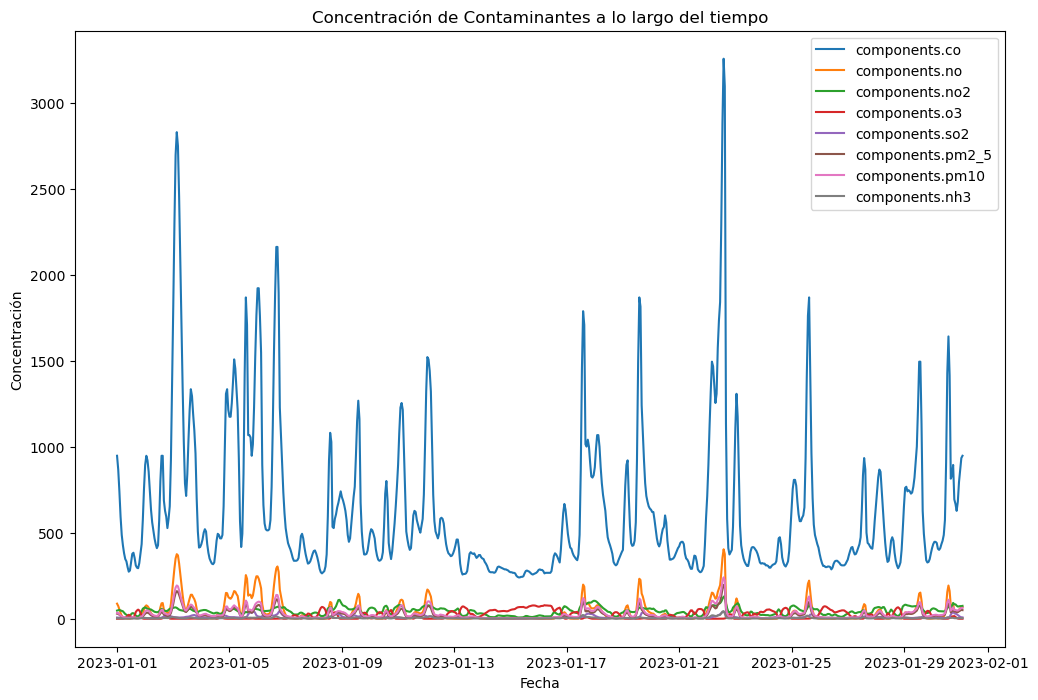

In [8]:


# Convierte la columna de fechas a formato datetime
df_contaminacion_aire_sept_23['dt'] = pd.to_datetime(df_contaminacion_aire_sept_23['dt'], unit='s')

# Gráfico de líneas para cada contaminante
contaminantes = ['components.co', 'components.no', 'components.no2', 'components.o3', 'components.so2', 'components.pm2_5', 'components.pm10', 'components.nh3']

plt.figure(figsize=(12, 8))

for contaminante in contaminantes:
    plt.plot(df_contaminacion_aire_sept_23['dt'], df_contaminacion_aire_sept_23[contaminante], label=contaminante)

plt.title('Concentración de Contaminantes a lo largo del tiempo')
plt.xlabel('Fecha')
plt.ylabel('Concentración')
plt.legend()
plt.show()


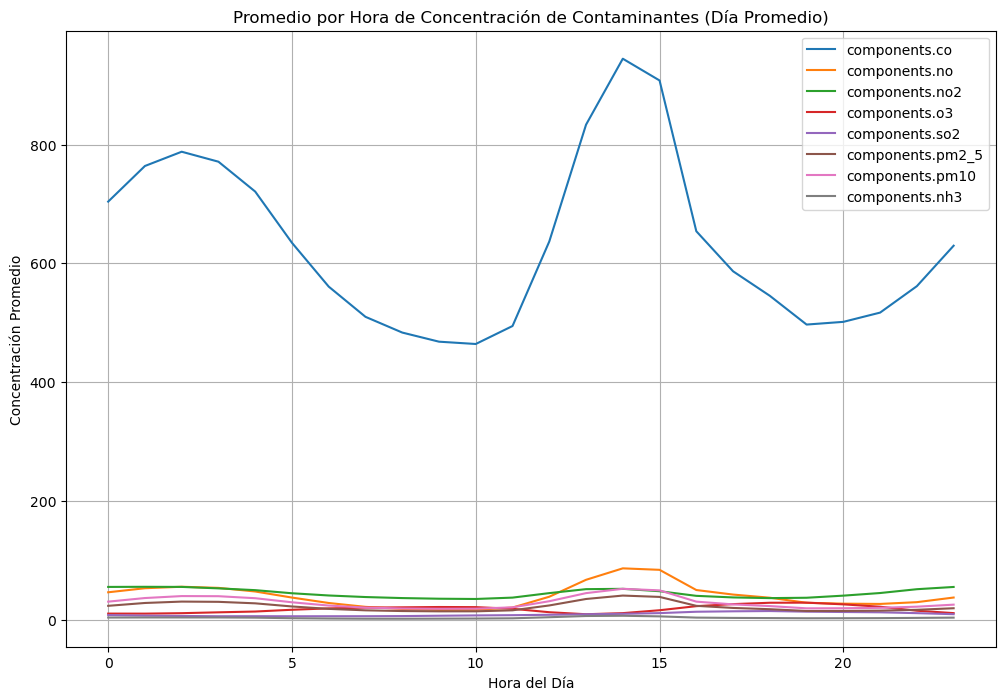

In [9]:

import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

# Convierte la columna de fechas a formato datetime
df_contaminacion_aire_sept_23['dt'] = pd.to_datetime(df_contaminacion_aire_sept_23['dt'], unit='s')

# Agrega una nueva columna para la hora del día
df_contaminacion_aire_sept_23['hora'] = df_contaminacion_aire_sept_23['dt'].dt.hour

# Lista de contaminantes
contaminantes = ['components.co', 'components.no', 'components.no2', 'components.o3', 'components.so2', 'components.pm2_5', 'components.pm10', 'components.nh3']

# Gráficos de línea para el promedio por hora de cada contaminante
plt.figure(figsize=(12, 8))

for contaminante in contaminantes:
    df_promedio_hora = df_contaminacion_aire_sept_23.groupby('hora')[contaminante].mean().reset_index()
    plt.plot(df_promedio_hora['hora'], df_promedio_hora[contaminante], label=contaminante)

plt.title('Promedio por Hora de Concentración de Contaminantes (Día Promedio)')
plt.xlabel('Hora del Día')
plt.ylabel('Concentración Promedio')
plt.legend()
plt.grid(True)
plt.show()



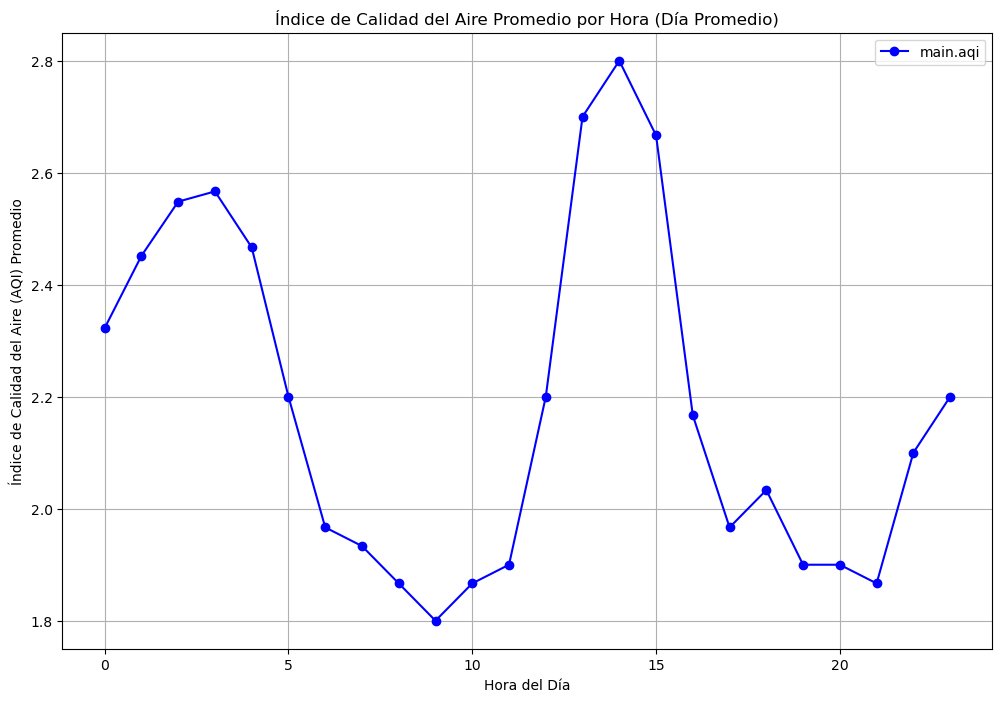

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

# Convierte la columna de fechas a formato datetime
df_contaminacion_aire_sept_23['dt'] = pd.to_datetime(df_contaminacion_aire_sept_23['dt'], unit='s')

# Agrega una nueva columna para la hora del día
df_contaminacion_aire_sept_23['hora'] = df_contaminacion_aire_sept_23['dt'].dt.hour

# Gráfico de línea para el promedio por hora de 'main.aqi'
df_promedio_hora = df_contaminacion_aire_sept_23.groupby('hora')['main.aqi'].mean().reset_index()

plt.figure(figsize=(12, 8))
plt.plot(df_promedio_hora['hora'], df_promedio_hora['main.aqi'], label='main.aqi', color='blue', marker='o')

plt.title('Índice de Calidad del Aire Promedio por Hora (Día Promedio)')
plt.xlabel('Hora del Día')
plt.ylabel('Índice de Calidad del Aire (AQI) Promedio')
plt.legend()
plt.grid(True)
plt.show()


In [24]:
# Extraer el día de la semana de la columna de fecha
df_contaminacion_aire_sept_23['day_of_week'] = df_contaminacion_aire_sept_23['dt'].dt.day_name()

# Extraer la hora del día de la columna de fecha
df_contaminacion_aire_sept_23['hour_of_day'] = df_contaminacion_aire_sept_23['dt'].dt.hour

# Ordenar los días de la semana
ordered_days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df_contaminacion_aire_sept_23['day_of_week'] = pd.Categorical(df_contaminacion_aire_sept_23['day_of_week'], categories=ordered_days, ordered=True)
df_contaminacion_aire_sept_23

,dt,main.aqi,components.co,components.no,components.no2,components.o3,components.so2,components.pm2_5,components.pm10,components.nh3,hora,main.aqi_categorias,day_of_week,hour_of_day
0,2023-01-01 00:00:00,3,947.95,87.62,47.30,0.00,6.97,29.53,33.77,2.91,0,Moderate,Sunday,0
1,2023-01-01 01:00:00,3,867.84,74.21,49.35,0.00,6.26,28.43,32.98,2.94,1,Moderate,Sunday,1
2,2023-01-01 02:00:00,2,741.00,53.64,50.72,0.00,5.90,22.58,26.64,2.37,2,Fair,Sunday,2
3,2023-01-01 03:00:00,2,594.14,33.53,47.98,0.00,5.84,16.07,19.31,1.76,3,Fair,Sunday,3
4,2023-01-01 04:00:00,2,487.33,16.99,45.93,0.02,5.72,11.69,13.89,1.17,4,Fair,Sunday,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
718,2023-01-30 22:00:00,3,680.92,40.68,70.60,1.07,21.46,38.78,47.53,3.45,22,Moderate,Monday,22
719,2023-01-30 23:00:00,3,794.41,52.75,71.97,0.00,15.74,42.78,52.10,3.96,23,Moderate,Monday,23
720,2023-01-31 00:00:00,3,867.84,59.90,73.34,0.00,10.97,46.74,56.54,3.80,0,Moderate,Tuesday,0
721,2023-01-31 01:00:00,4,934.60,66.16,73.34,0.00,8.46,51.33,62.55,3.83,1,Poor,Tuesday,1


In [26]:
# Seleccionar solo las columnas requeridas
air_quality_por_semana_y_hora = df_contaminacion_aire_sept_23[['main.aqi_categorias', 'day_of_week', 'hour_of_day']]
air_quality_por_semana_y_hora

,main.aqi_categorias,day_of_week,hour_of_day
0,Moderate,Sunday,0
1,Moderate,Sunday,1
2,Fair,Sunday,2
3,Fair,Sunday,3
4,Fair,Sunday,4
...,...,...,...
718,Moderate,Monday,22
719,Moderate,Monday,23
720,Moderate,Tuesday,0
721,Poor,Tuesday,1


C:\Users\Heidi\AppData\Local\Temp\ipykernel_5592\2891891899.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  air_quality_por_semana_y_hora['main.aqi_numerico'] = air_quality_por_semana_y_hora['main.aqi_categorias'].map(mapeo_aqi)


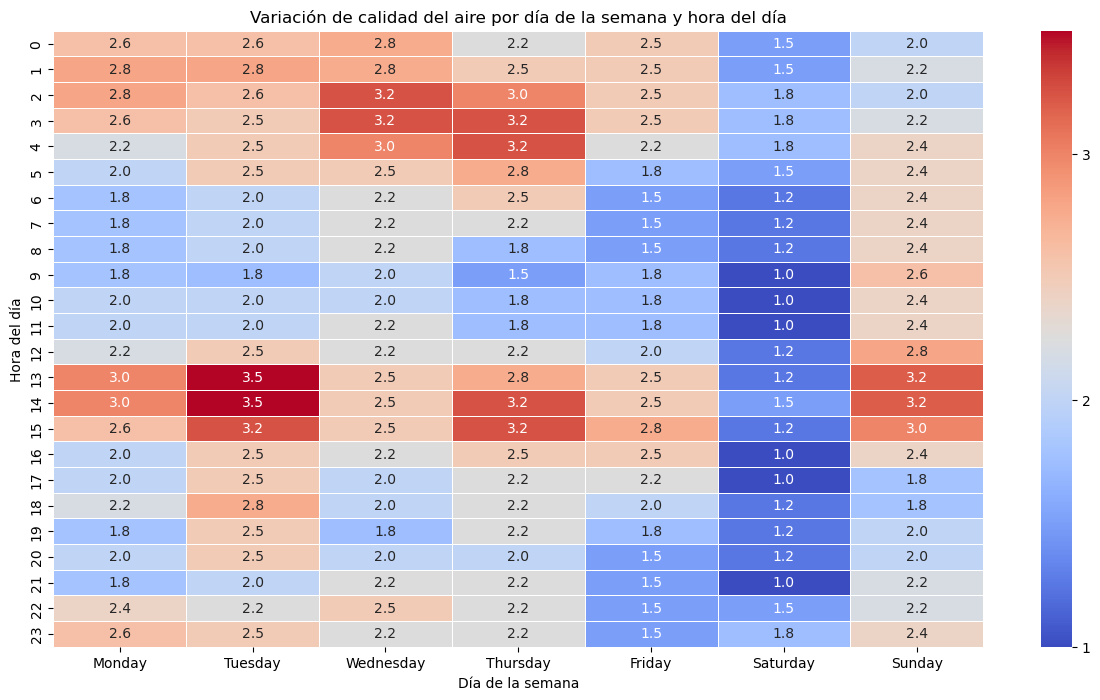

In [28]:


# Supongamos que 'main.aqi' ya ha sido mapeado a categorías en el DataFrame df_contaminacion_aire_sept_23
# y que tienes un DataFrame llamado air_quality_por_semana_y_hora con las columnas 'main.aqi_categorias', 'day_of_week', 'hour_of_day'

# Mapear categorías a valores numéricos
mapeo_aqi = {"Good": 1, "Fair": 2, "Moderate": 3, "Poor": 4, "Very Poor": 5}
air_quality_por_semana_y_hora['main.aqi_numerico'] = air_quality_por_semana_y_hora['main.aqi_categorias'].map(mapeo_aqi)

# Configurar el tamaño del gráfico
plt.figure(figsize=(15, 8))

# Crear un gráfico de heatmap
heatmap_data = air_quality_por_semana_y_hora.pivot_table(index='hour_of_day', columns='day_of_week', values='main.aqi_numerico', aggfunc='mean')

# Ajustar la paleta de colores para las categorías
palette = sns.color_palette("coolwarm", as_cmap=True, n_colors=len(mapeo_aqi))

# Crear el heatmap
sns.heatmap(heatmap_data, cmap=palette, annot=True, fmt='.1f', linewidths=.5, cbar_kws={"ticks": range(1, len(mapeo_aqi) + 1)})

# Configurar etiquetas y título
plt.title('Variación de calidad del aire por día de la semana y hora del día')
plt.xlabel('Día de la semana')
plt.ylabel('Hora del día')

# Mostrar el gráfico
plt.show()


## Forecast (prediccion) Pollution 9/12/23

In [11]:
# Abrir el nuevo archivo JSON descargado
with open('Datasets\pollution_forecast.json', 'r') as archivo_json:
    nuevo_data_dict = json.load(archivo_json)

# Mostrar el contenido original del nuevo JSON
print("Contenido original del nuevo JSON:")
print(json.dumps(nuevo_data_dict, indent=2))

Contenido original del nuevo JSON:
{
  "coord": {
    "lon": -73.9604,
    "lat": 40.7896
  },
  "list": [
    {
      "main": {
        "aqi": 5
      },
      "components": {
        "co": 1695.63,
        "no": 166.3,
        "no2": 89.11,
        "o3": 0,
        "so2": 6.08,
        "pm2_5": 96.64,
        "pm10": 120.46,
        "nh3": 5.89
      },
      "dt": 1702094400
    },
    {
      "main": {
        "aqi": 5
      },
      "components": {
        "co": 1415.25,
        "no": 128.75,
        "no2": 82.25,
        "o3": 0,
        "so2": 6.2,
        "pm2_5": 76.3,
        "pm10": 95.33,
        "nh3": 3.45
      },
      "dt": 1702098000
    },
    {
      "main": {
        "aqi": 4
      },
      "components": {
        "co": 1134.87,
        "no": 91.2,
        "no2": 74.71,
        "o3": 0,
        "so2": 6.08,
        "pm2_5": 59.29,
        "pm10": 74.07,
        "nh3": 2.09
      },
      "dt": 1702101600
    },
    {
      "main": {
        "aqi": 4
      },
      

In [12]:
# Crear una función para convertir el formato de fecha para el nuevo conjunto de datos
def convertir_formato_fecha_nuevo(item):
    # Convertir el dt a un objeto de datetime y reemplazar la clave 'dt'
    item['fecha'] = datetime.utcfromtimestamp(item.pop('dt'))

# Aplicar la función de conversión de formato de fecha a cada elemento de la lista en el nuevo conjunto de datos
for item in nuevo_data_dict['list']:
    convertir_formato_fecha_nuevo(item)

# Mostrar el contenido del nuevo JSON con el nuevo formato de fecha
print("\nContenido del nuevo JSON con nuevo formato de fecha:")
print(json.dumps(nuevo_data_dict, default=str, indent=2))


Contenido del nuevo JSON con nuevo formato de fecha:
{
  "coord": {
    "lon": -73.9604,
    "lat": 40.7896
  },
  "list": [
    {
      "main": {
        "aqi": 5
      },
      "components": {
        "co": 1695.63,
        "no": 166.3,
        "no2": 89.11,
        "o3": 0,
        "so2": 6.08,
        "pm2_5": 96.64,
        "pm10": 120.46,
        "nh3": 5.89
      },
      "fecha": "2023-12-09 04:00:00"
    },
    {
      "main": {
        "aqi": 5
      },
      "components": {
        "co": 1415.25,
        "no": 128.75,
        "no2": 82.25,
        "o3": 0,
        "so2": 6.2,
        "pm2_5": 76.3,
        "pm10": 95.33,
        "nh3": 3.45
      },
      "fecha": "2023-12-09 05:00:00"
    },
    {
      "main": {
        "aqi": 4
      },
      "components": {
        "co": 1134.87,
        "no": 91.2,
        "no2": 74.71,
        "o3": 0,
        "so2": 6.08,
        "pm2_5": 59.29,
        "pm10": 74.07,
        "nh3": 2.09
      },
      "fecha": "2023-12-09 06:00:00"


In [13]:
# Definir la función para obtener la descripción del AQI
def obtener_descripcion_aqi(aqi_valor):
    descripcion_aqi = {
        1: "Good",
        2: "Fair",
        3: "Moderate",
        4: "Poor",
        5: "Very Poor"
    }
    return descripcion_aqi.get(aqi_valor, "Desconocido")


In [14]:
# Crear una función para mostrar el AQI con su descripción dentro de un rango de horas
def mostrar_aqi_con_descripcion_rango_horas(item, hora_inicio, hora_fin):
    fecha = item['fecha']
    
    # Filtrar por el rango de horas
    if hora_inicio <= fecha.time() <= hora_fin:
        aqi_valor = item['main']['aqi']
        descripcion_aqi = obtener_descripcion_aqi(aqi_valor)
        print(f"Fecha: {fecha}, AQI: {aqi_valor} ({descripcion_aqi})")

# Especificar el rango de horas deseado (ajusta esto según tus necesidades)
hora_inicio_deseada = time(8, 0)  # Por ejemplo, 8:00 AM
hora_fin_deseada = time(10, 0)    # Por ejemplo, 10:00 AM

# Mostrar el AQI con su descripción para el rango de horas deseado para cada elemento en el nuevo conjunto de datos
print(f"\nAQI con descripción para el rango de horas {hora_inicio_deseada} - {hora_fin_deseada}:")
for item in nuevo_data_dict['list']:
    mostrar_aqi_con_descripcion_rango_horas(item, hora_inicio_deseada, hora_fin_deseada)


AQI con descripción para el rango de horas 08:00:00 - 10:00:00:
Fecha: 2023-12-09 08:00:00, AQI: 4 (Poor)
Fecha: 2023-12-09 09:00:00, AQI: 4 (Poor)
Fecha: 2023-12-09 10:00:00, AQI: 3 (Moderate)
Fecha: 2023-12-10 08:00:00, AQI: 5 (Very Poor)
Fecha: 2023-12-10 09:00:00, AQI: 5 (Very Poor)
Fecha: 2023-12-10 10:00:00, AQI: 4 (Poor)
Fecha: 2023-12-11 08:00:00, AQI: 1 (Good)
Fecha: 2023-12-11 09:00:00, AQI: 1 (Good)
Fecha: 2023-12-11 10:00:00, AQI: 1 (Good)
Fecha: 2023-12-12 08:00:00, AQI: 1 (Good)
Fecha: 2023-12-12 09:00:00, AQI: 1 (Good)
Fecha: 2023-12-12 10:00:00, AQI: 1 (Good)
